In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from IPython.display import display
import itertools, time, os, pickle, json, tempfile, sys
import seaborn as sns
from tqdm.notebook import tqdm
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
srcpath = os.path.abspath(os.path.join(os.path.abspath(''),  '..',  'src'))
sys.path.append(srcpath)
from exp_utils import *
#from data_gen_full import *
%load_ext autoreload
%autoreload 2

def append_K_N_diff(df, m ,  key, N_list = np.linspace(2,3000, 15, dtype=int), N_trials = 20 , delta = 0.1):
    high_prob_kerr = []
    for N in N_list:
        high_prob_kerr.append( high_prob_upper( df.loc[N,:]["K_err"], delta ) )
    return high_prob_kerr


 

plt.rcParams.update({
     "text.usetex" : "true",
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


plt.rc('figure', dpi=150)





```(relative, 0.05)``` implies $ R^{emp}(f_{N^*}) \approx 1 - (0.95)Acc(f^*) $ w.h.p


```(margin, 1) ``` implies  $ R^{emp}(f_{N^*}) \approx R_{1}^{emp}(f^*) $ w.h.p

In [87]:


with open('data_full_new.pkl', 'rb') as f:
    data = pickle.load(f)
    data = pd.DataFrame.from_dict(data, orient = 'index')
    data.index = pd.MultiIndex.from_tuples(data.index,  names=['kernel,dataset', 'm_train', 'C'])

data.columns

Index(['N_star_output', 'f_pred_exact', 'y_train', 'C_val', 'm_sv', 'K_train',
       'N_margin_recomputed'],
      dtype='object')

In [88]:
#data.loc[:,[120],["optimal"]] ["N_vs_y_pred"][1]
data = data.rename_axis(index = lambda x: x.replace('_', ' ') if type(x)==str else x)
data =  data.rename(columns = lambda x: x.replace('_', ' ') if type(x)==str else x)
margin_err = []
misclass_err = []
N_star_theorem = []
N_star = []
N_list = np.linspace(2,4000, 15, dtype=int)
for x in tqdm(data.index):
    #print(x)
    row = data.loc[x]
    margin_err.append( np.mean(row["y train"]*row["f pred exact"] < 1.0 - 1e-3) )
    misclass_err.append( np.mean(row["y train"]*row["f pred exact"]<0 ) ) 
    if row["N star output"][0] is not None:
        N_star.append(row["N margin recomputed"])
    else:
        N_star.append(None)
#    print(N_star_K[-1])
   
#    N_star_theorem.append( 2*(row["C val"]**2)*row["m sv"]* np.log(x[1]/0.1) )
data["margin err"] = margin_err
data["misclass"] = misclass_err
data["N star"] = N_star
#data["N star theorem"] = N_star_theorem
data = data.sort_values("misclass")

data

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 156/156 [00:00<00:00, 1632.80it/s]


,,,N star output,f pred exact,y train,C val,m sv,K train,N margin recomputed,margin err,misclass,N star
"kernel,dataset",m train,C,,,,,,,,,,
"(Havliscek, Gen,5)",60,1,"(24, 0.0)","[0.9997912281037566, -0.9998842668700543, 1.00...","[1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -...",1,60,"[[1.0, 0.012233239335688506, 0.002097167972381...",NaN,0.266667,0.000000,NaN
"(Angle,2, Circles)",40,5,"(None, None)","[0.9950074847979073, 1.0021900065048883, 1.002...","[1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -...",5,32,"[[1.0, 0.7375111056974838, 0.5125782778641892,...",NaN,0.200000,0.000000,NaN
"(QAOA, Circles)",120,5,"(203, 0.0)","[-1.5144458558940799, 1.2068916024883243, 1.19...","[-1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -...",5,27,"[[1.0, 0.2105132282289048, 0.25467748412787655...",450.0,0.100000,0.000000,450.0
"(Angle,2, Two_Moons)",40,5,"(79, 0.0)","[1.1720850407284975, 0.5876659701224314, 1.000...","[1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -...",5,14,"[[1.0, 0.7947320163463312, 0.6595633677782635,...",350.0,0.050000,0.000000,350.0
"(QAOA,2, Checkerboard)",120,1,"(14, 0.0)","[1.1712905438169425, -1.2151097034427851, 1.42...","[1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",1,42,"[[1.0, 0.06538774904309058, 0.9376745197428062...",50.0,0.183333,0.000000,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
"(Angle, Checkerboard)",40,1,"(None, None)","[0.6332275098068438, 0.3825519472731218, 0.637...","[1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",1,34,"[[1.0, 0.14186174657731696, 0.9955111606584821...",NaN,0.775000,0.400000,NaN
"(Angle,2, Checkerboard)",40,1,"(None, None)","[0.3248676809017802, 0.10136417505061979, 0.42...","[1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",1,34,"[[1.0, 0.02012475514196689, 0.991042470995598,...",NaN,0.725000,0.400000,NaN
"(Havliscek, Checkerboard)",60,1,"(None, None)","[0.8345792646162309, 0.00445066402597824, 0.99...","[1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",1,55,"[[1.0, 0.0036459732061947634, 0.98586482468958...",NaN,0.850000,0.416667,NaN


In [124]:
#df = data[data["N star output"][0] > 5]
df = data[data["margin err"] < 0.05]


df = df[["C val", "m sv", "margin err", "N star"  ]]
data_final = df.loc[df["C val"].isin([5])].reset_index("m train")#.sort_values(["m sv"])

data_final["val"] = data_final.apply (lambda row: 2*row["m sv"]*(row["C val"]**2)*np.log(row["m train"]/0.1), axis=1)
data_final = data_final.loc[data_final["m train"].isin([40, 60,120])].sort_values(["m sv"])
#sns.scatterplot(data =  data_final,
#x= "m sv", y="N star", s = 30)
#plt.xscale("log")
#plt.yscale("log")

data_final


,,m train,C val,m sv,margin err,N star,val
"kernel,dataset",C,,,,,,
"(QAOA, Two_Moons)",5,120,5,12,0.000000,300.0,4254.046101
"(Havliscek, Gen,2)",5,60,5,12,0.033333,350.0,3838.157793
"(Angle,2, Two_Moons)",5,60,5,12,0.033333,600.0,3838.157793
"(Havliscek, Gen,2)",5,120,5,13,0.016667,350.0,4608.549943
"(Angle,2, Two_Moons)",5,120,5,14,0.016667,550.0,4963.053785
"(QAOA,2, Checkerboard)",5,40,5,17,0.000000,700.0,5092.744865
"(Havliscek,2, Checkerboard)",5,60,5,17,0.000000,400.0,5437.390207
"(QAOA,2, Checkerboard)",5,60,5,17,0.000000,700.0,5437.390207
"(Havliscek,2, Checkerboard)",5,40,5,18,0.000000,300.0,5392.318092


In [90]:
#idx_c = [x for x in data.index if x[0][1] == "Checkerboard"]
#data.loc[idx_c]

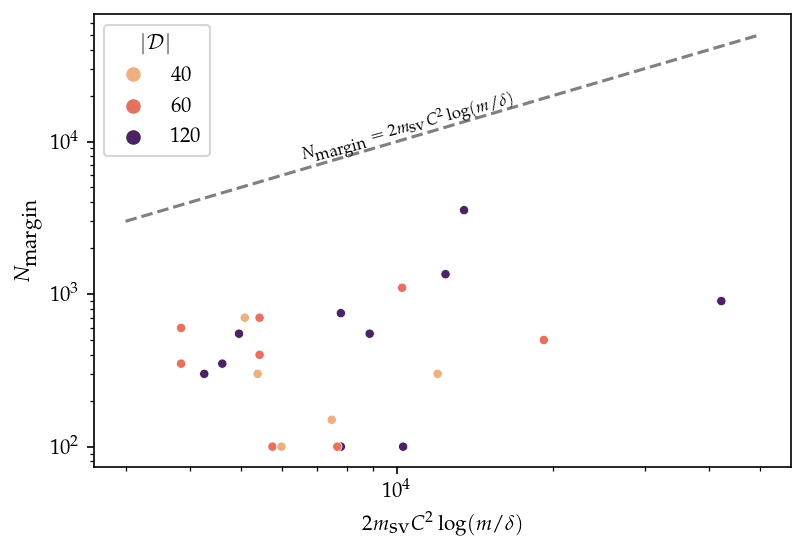

In [131]:
sns.scatterplot(data =  data_final,
x= "val", y="N star", palette="flare", hue = "m train", s = 20)

plt.xlabel("$ 2 m_{\\textrm{sv}} C^2 \\log(m/\\delta)$")
plt.ylabel("$N_{\\textrm{margin}}$")
plt.xscale("log")
plt.yscale("log")
plt.legend(loc='upper left', title = "$|\mathcal{D}|$")
plt.plot(np.linspace(3000,50000, 15, dtype=int),np.linspace(3000,50000, 15, dtype=int), "--", color = "grey")
plt.annotate("$N_{\\textrm{margin}} =  2 m_{\\textrm{sv}} C^2 \\log(m/\\delta)$", xy=(6500, 7800),
             rotation= 15, fontsize = 8)
plt.savefig("N_margin.pdf")

In [29]:
data.xs(120, level = "m_train")

KeyError: 'Level m_train not found'